In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [22]:
all_mtgs_df = pd.read_csv('all_meetings_2008_2012_w_sponsor.csv')
all_mtgs_df.head(10)

,Unnamed: 0,Unnamed: 0.1,mtg_date,mtg_details_url,mtg_title,year,sponsor
0,0,0,2008-01-03,https://www.chesapeakebay.net/what/event/tmaw_...,TMAW meeting,2008,NaN
1,1,1,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN
2,2,2,2008-01-09,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN
3,3,3,2008-01-09,https://www.chesapeakebay.net/what/event/nonti...,Nontidal Water Quality Workgroup Conference Call,2008,NaN
4,4,4,2008-01-10,https://www.chesapeakebay.net/what/event/reeva...,Reevaluation Technical Workgroup Conference Call,2008,NaN
5,5,5,2008-01-17,https://www.chesapeakebay.net/what/event/model...,Modeling in the Chesapeake Bay Program: 2010 a...,2008,NaN
6,6,6,2008-01-17,https://www.chesapeakebay.net/what/event/tmaw_...,TMAW meeting,2008,NaN
7,7,7,2008-01-17,https://www.chesapeakebay.net/what/event/tmaw5,TMAW,2008,NaN
8,8,8,2008-01-22,https://www.chesapeakebay.net/what/event/water...,Water Quality Steering Committee Conference Call,2008,NaN
9,9,9,2008-01-22,https://www.chesapeakebay.net/what/event/educa...,Education Workgroup Conference Call,2008,NaN


In [23]:
# sponsor = Modeling Workgroup
# mtg_title includes "Scientific and Technical Advisory Committee" 
# or "Modeling Quarterly Review"
# or "Modeling Subcommittee"

mtg_locs = []

for i, row in all_mtgs_df.iterrows():
    
    # look for WQSC meetings
    if row['mtg_title'].lower().find('modeling quarterly review') != -1:
        #print(row['mtg_title'])
        mtg_locs.append(i)



In [24]:
all_mtgs_df.loc[mtg_locs]

,Unnamed: 0,Unnamed: 0.1,mtg_date,mtg_details_url,mtg_title,year,sponsor
537,537,21,2010-03-31,https://www.chesapeakebay.net/what/event/model...,Modeling Quarterly Review,2010,NaN
539,539,1,2010-04-01,https://www.chesapeakebay.net/what/event/model...,Modeling Quarterly Review,2010,NaN
617,617,9,2010-07-13,https://www.chesapeakebay.net/what/event/model...,Modeling Quarterly Review,2010,NaN
618,618,10,2010-07-14,https://www.chesapeakebay.net/what/event/model...,Modeling Quarterly Review,2010,NaN
1043,1043,10,2012-04-16,https://www.chesapeakebay.net/what/event/model...,Modeling Quarterly Review Meeting 4/16,2012,Modeling Workgroup
1045,1045,12,2012-04-17,https://www.chesapeakebay.net/what/event/model...,Modeling Quarterly Review Meeting,2012,Modeling Workgroup
1104,1104,1,2012-07-11,https://www.chesapeakebay.net/what/event/july_...,July Modeling Quarterly Review,2012,Modeling Workgroup
1174,1174,1,2012-10-02,https://www.chesapeakebay.net/what/event/octob...,October Modeling Quarterly Review,2012,Modeling Workgroup
1177,1177,4,2012-10-03,https://www.chesapeakebay.net/what/event/octob...,October Modeling Quarterly Review,2012,Modeling Workgroup


In [25]:
mtg_locs = []

for i, row in all_mtgs_df.iterrows():
    
    # look for WQSC meetings
    if row['mtg_title'].lower().find('modeling') != -1:
        #print(row['mtg_title'])
        mtg_locs.append(i)

In [26]:
modwg = all_mtgs_df.loc[mtg_locs]

In [27]:
# join with n_model data

n_model = pd.read_csv('most_model_mentions_mtgs_sum.csv')
n_model.head()

,mtg_details_url,year,n_model,mtg_date
0,https://www.chesapeakebay.net/what/event/water...,2012,1534,2012-10-23
1,https://www.chesapeakebay.net/what/event/model...,2011,927,2011-01-12
2,https://www.chesapeakebay.net/what/event/model...,2011,927,2011-01-11
3,https://www.chesapeakebay.net/what/event/manag...,2011,576,2011-09-27
4,https://www.chesapeakebay.net/what/event/model...,2012,567,2012-06-21


In [28]:
modwg = modwg.merge(n_model, on = 'mtg_details_url')

In [29]:
modwg = modwg[['mtg_date_x', 'mtg_details_url','mtg_title', 'year_x', 'sponsor', 'n_model']]
modwg.columns = ['mtg_date', 'mtg_details_url','mtg_title', 'year', 'sponsor', 'n_model']

In [30]:
modwg.head()

,mtg_date,mtg_details_url,mtg_title,year,sponsor,n_model
0,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN,80
1,2008-01-09,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN,80
2,2008-04-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN,77
3,2008-04-28,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN,223
4,2008-04-29,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN,223


In [31]:
len(modwg['mtg_details_url'].unique())  # there are some repeated URLs

43

In [32]:
# remove repeated events

modwg.drop_duplicates(subset = ['mtg_details_url'], inplace = True)

In [33]:
modwg.head()

,mtg_date,mtg_details_url,mtg_title,year,sponsor,n_model
0,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN,80
1,2008-01-09,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN,80
2,2008-04-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN,77
3,2008-04-28,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN,223
4,2008-04-29,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,NaN,223


/home/tclim/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


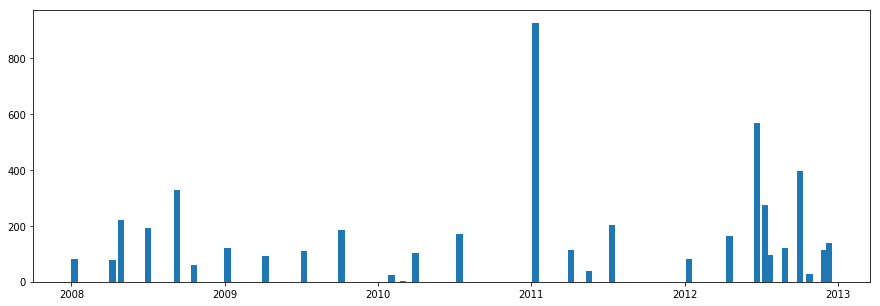

In [34]:
#plot frequencies by date
modwg['mtg_date'] = pd.to_datetime(modwg['mtg_date'], format='%Y-%m-%d')
modwg = modwg.sort_values('mtg_date').reset_index()
modwg.set_index('mtg_date', inplace=True)

fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.bar(modwg.index ,modwg['n_model'], width=15)
ax.xaxis_date()

plt.show()

In [35]:
modwg.shape

(43, 6)

# Download documents from 43 meetings

In [36]:
docs = pd.read_csv('all_meetings_all_docs_2008_2012.csv')
docs.columns

Index(['Unnamed: 0', 'index', 'doc_link_text', 'doc_url', 'mtg_date',
       'mtg_details_url', 'mtg_title', 'year'],
      dtype='object')

In [39]:
docs_modwg = docs.merge(modwg, on = 'mtg_details_url')

In [40]:
docs_modwg.head()

,Unnamed: 0,index_x,doc_link_text,doc_url,mtg_date,mtg_details_url,mtg_title_x,year_x,index_y,mtg_title_y,year_y,sponsor,n_model
0,0,0,File,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,0,Modeling Subcommittee Quarterly Review,2008,NaN,80
1,1,1,Algal Speciation Model and Calibration of Poto...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,0,Modeling Subcommittee Quarterly Review,2008,NaN,80
2,2,2,Status of the Community Multiscale Air Quality...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,0,Modeling Subcommittee Quarterly Review,2008,NaN,80
3,3,3,Contributions of Shore Erosion and Resuspensio...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,0,Modeling Subcommittee Quarterly Review,2008,NaN,80
4,4,4,Chesapeake Bay Phase 5 Community Watershed Mod...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,0,Modeling Subcommittee Quarterly Review,2008,NaN,80


In [41]:
# Iterate through all wqgit meetings by url,
# subset docs df by that meeting's url,
# then return the meeting minutes url if there is one, if not, return none

minutes_docs = []

for i, row in modwg.iterrows():
    
    cur_url = row['mtg_details_url']
    
    #subset docs_wqgit:
    cur_mtg_docs_df = docs_modwg[docs_modwg['mtg_details_url'] == cur_url]
    
    # this meeting's doc titles
    cur_mtg_minutes_docs = []
    
    for j, rrow in cur_mtg_docs_df.iterrows():
    
        words_in_doc_title = rrow['doc_link_text'].lower().split(' ')
    
        if ('minutes' in words_in_doc_title) or ('summary' in words_in_doc_title):
            cur_mtg_minutes_docs.append(rrow['doc_link_text'].lower())
            minutes_index = j  # if it is a minutes doc, then save the index as minutes_index
            
            # stop iterating through the rest of the files
            break
    
    # For this meeting, check if there is 1 "minutes doc"
    if len(cur_mtg_minutes_docs) == 1:
        minutes_docs.append(cur_mtg_docs_df.loc[minutes_index]['doc_url'])
    
    elif len(cur_mtg_minutes_docs) > 1:
        print("there is more than one minutes doc for %s meeting" %i) 
        # Just append the first one (in each case, they are duplicates of the same doc)
        print(cur_mtg_minutes_docs)
        minutes_docs.append(cur_mtg_docs_df.loc[minutes_index]['doc_url'])
    
    else:
        print('no minutes doc for %s meeting' %i)
        minutes_docs.append(None)

no minutes doc for 2008-01-08 00:00:00 meeting
no minutes doc for 2008-01-09 00:00:00 meeting
no minutes doc for 2008-04-08 00:00:00 meeting
no minutes doc for 2008-07-02 00:00:00 meeting
no minutes doc for 2009-07-08 00:00:00 meeting
no minutes doc for 2009-10-06 00:00:00 meeting
no minutes doc for 2009-10-07 00:00:00 meeting
no minutes doc for 2010-03-02 00:00:00 meeting
no minutes doc for 2011-01-11 00:00:00 meeting
no minutes doc for 2011-01-12 00:00:00 meeting
no minutes doc for 2011-04-05 00:00:00 meeting
no minutes doc for 2011-07-12 00:00:00 meeting
no minutes doc for 2011-07-13 00:00:00 meeting
no minutes doc for 2012-01-11 00:00:00 meeting
no minutes doc for 2012-05-21 00:00:00 meeting
no minutes doc for 2012-10-02 00:00:00 meeting
no minutes doc for 2012-11-30 00:00:00 meeting


In [42]:
len(minutes_docs)

43

In [43]:
modwg['minutes_doc_url'] = minutes_docs

In [45]:
modwg.to_csv('modwg_meetings_minutes_docs.csv')

# Download and Save docs

In [48]:
import urllib.request

In [50]:
# Download temporary files, then remove the file from the directory each time
directory = '/home/tclim/Dropbox/projects/chesapeake_bay/modwg_minutes_docs_2008_2012/'

acceptable_ext = ['csv', 'doc', 'docx', 'eml', 'epub', 'gif', 'htm', 'html', 'jpeg', 'jpg', 
                  'json', 'log', 'mp3', 'msg', 'odt', 'ogg', 'pdf', 'png', 'pptx', 'ps', 
                  'psv', 'rtf', 'tab', 'tff', 'tif', 'tiff', 'tsv', 'txt', 'wav', 'xls', 'xlsx']

doc_matches = []

for i, row in modwg.iterrows():
    print(i)
    cur_url = row['minutes_doc_url']
    
    if cur_url is None:
        doc_matches.append(None)
        continue
        
    tmp_fnam = directory + i.strftime("%Y-%m-%d") + "_" +  cur_url.split('/')[-1]
    
    f_ext = tmp_fnam.split('.')[-1]
    
    if f_ext not in acceptable_ext:   # if not an accepted filetype, skip for now.
        doc_matches.append(None)
        print("unsupported file type: " + f_ext)
    
    else:
        # Download
        try:
            urllib.request.urlretrieve(cur_url, tmp_fnam)
        
        except BaseException as err:
            doc_matches.append(None)
            print("HTTPErr: {0}".format(err))
            pass

2008-01-08 00:00:00
2008-01-09 00:00:00
2008-04-08 00:00:00
2008-04-28 00:00:00
2008-04-29 00:00:00
2008-07-02 00:00:00
2008-07-02 00:00:00
2008-09-08 00:00:00
2008-09-09 00:00:00
2008-10-20 00:00:00
2009-01-06 00:00:00
2009-01-07 00:00:00
2009-04-07 00:00:00
2009-04-08 00:00:00
2009-07-08 00:00:00
2009-10-06 00:00:00
2009-10-07 00:00:00
2010-02-02 00:00:00
2010-02-03 00:00:00
2010-03-02 00:00:00
2010-03-31 00:00:00
2010-04-01 00:00:00
2010-07-13 00:00:00
2010-07-14 00:00:00
2011-01-11 00:00:00
2011-01-12 00:00:00
2011-04-05 00:00:00
2011-05-19 00:00:00
2011-07-12 00:00:00
2011-07-13 00:00:00
2012-01-11 00:00:00
2012-04-16 00:00:00
2012-04-17 00:00:00
2012-05-21 00:00:00
2012-06-21 00:00:00
2012-07-11 00:00:00
2012-07-23 00:00:00
2012-08-28 00:00:00
2012-10-02 00:00:00
2012-10-25 00:00:00
2012-11-28 00:00:00
2012-11-30 00:00:00
2012-12-10 00:00:00


In [47]:
err

NameError: name 'err' is not defined